In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
from  scipy.stats import binom 
from pimad.models.toycontinuous import ToyContinuous
from pimad.figures.convergence import *
%matplotlib inline

# Group size distribution

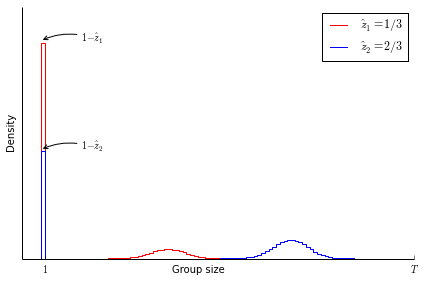

In [10]:
x = range(101)
z = 1/3
T = 100
y = analytical({"m":1/3,"r":1/3})
plt.plot(x,y,color="red",label="$\hat{z}_1=1/3$",ls = "steps")

ax = plt.gca()
ax.annotate(r'$1-\hat{z}_1$', xy=(0,1-z),xycoords="data", textcoords="offset points",
            xytext=(+40,0),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
z = 2/3
y = analytical({"m":2/3,"r":2/3})
plt.plot(x,y,color="blue",label="$\hat{z}_2=2/3$",ls = "steps")


ax.annotate(r'$1-\hat{z}_2$', xy=(0,1-z),xycoords="data", textcoords="offset points", xytext=(+40,0),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

ax.axis([-5,T,0,1-0.33+0.1])
ax.spines['right'].set_color("none")
ax.spines['top'].set_color("none")
ax.xaxis.set_ticks([1,T])
ax.set_xticklabels(['$1$','$T$'])
ax.yaxis.set_ticks([])
ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_label_coords(.45, -0.025)
ax.set_xlabel("Group size")
ax.set_ylabel("Density")
plt.legend()
plt.tight_layout()
plt.savefig("sizedistr.eps")


# Cost functions

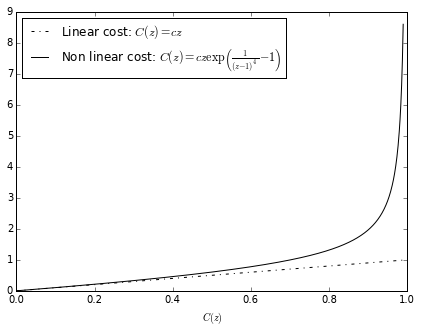

In [22]:
def cost(z,c,chi):
    return c* z * np.exp( (1-z)**(-1.0/chi) - 1 ) 

plt.figure(figsize=(7,5))

x = np.linspace(0,1,1000)[:-10]
plt.plot(x,x,"k-.",label="Linear cost: $C(z)=cz$")
plt.plot(x,cost(x,1,4),"k-",
         label=r"Non linear cost: $C(z)=cz \exp\left(\frac{1}{(z-1)^4} - 1\right )$")
plt.legend(loc="upper left")
plt.xlabel(r"$z$")
plt.xlabel(r"$C(z)$")

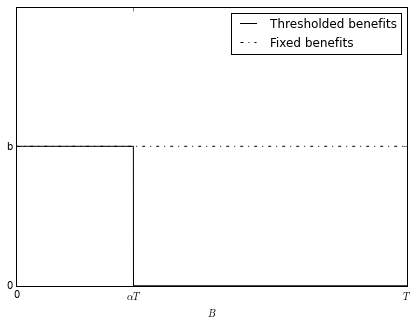

In [42]:
plt.figure(figsize=(7,5))

alpha = .3
T = 100
x = np.arange(0,T,step=0.001)

plt.plot(x,[1 if z<alpha*T else 0 for z in x],"k-",
         label=r"Thresholded benefits")
plt.plot(x,[1]*len(x),"k-.",label="Fixed benefits")

plt.legend()
plt.ylim(0,2)
plt.yticks((0,1),(0,"b"))
plt.xticks([0,alpha*T ,T],("0",r"$\alpha T$",r"$T$"))
plt.xlabel(r"$T$")
plt.xlabel(r"$B$")


#Threshold

(0, 50)

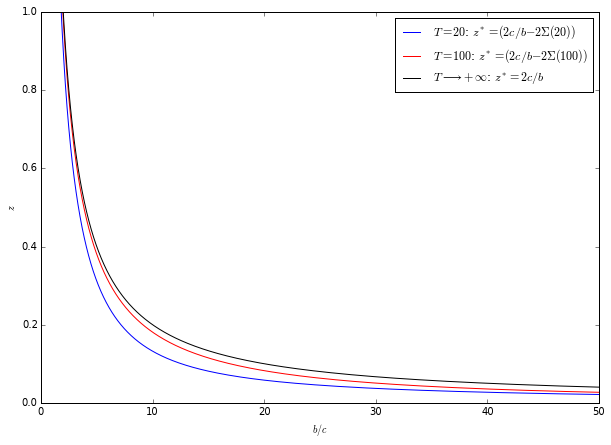

In [103]:
plt.figure(figsize=(10,7))
def bc(Z,T):
    if T == np.inf:
        return 2.0/Z
    else:
        return 2.0/( 2*((T*Z - 1 + (1-Z)**T) / (Z*(T-1)*T) ) + Z)

z = np.arange(0.001,1.001,0.001)
theo = 2.0/z

plt.plot(bc(z,20),z, color="b",label="$T = 20 $: $z^{*} = (2c/b - 2\Sigma(20))$")
plt.plot(bc(z,100),z, color="r",label="$T = 100 $: $z^{*}= (2c/b - 2\Sigma(100))$")
plt.plot(bc(z,np.inf),z, color="k",label="$T \longrightarrow + \infty $: $z^* = 2c/b$")
plt.legend()
plt.ylabel("$z$")
plt.xlabel("$b/c$")
plt.ylim((0,1))
plt.xlim((0,50))


# Altruism

In [ ]:
def sigma(z,T):
    s = 0
    for n in range(2,T+1):
        s += g(n,z+0.001,z,T)/n
    return s

T = 100
z = np.arange(0.001,1.001,0.001)
minz = 2.0/z
maxz = [1/sigma(r,T) for r in z]

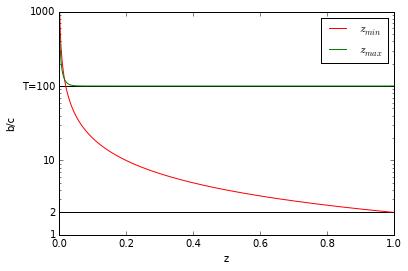

In [96]:
plt.plot(z,minz, "r",label="$z_{min}$")
plt.plot(z,maxz, "g",label="$z_{max}$")
plt.hlines(T,*plt.xlim())
plt.hlines(2,*plt.xlim())

ax = plt.gca()
ax.semilogy()
plt.xlabel("z")
plt.ylabel("b/c")
plt.xlim((0,1))
plt.ylim((0,1000))
plt.yticks([1,2,10,100,1000],[1,2,10,"T=100",1000])
plt.legend()